<a href="https://colab.research.google.com/github/ishivxnshh/Machine-Learning/blob/main/project_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import numpy as np
import pandas as pd

In [292]:
df = pd.read_csv('/content/placement.csv')

In [293]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [294]:
df.shape

(100, 4)

In [295]:
df = df.iloc[:,1:]

In [296]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


**Steps**
1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
3.   Scale the values
4.   Train the model
5.   Evaluate the model/model selection
6.   Deploy the model

In [297]:
import matplotlib.pyplot as plt

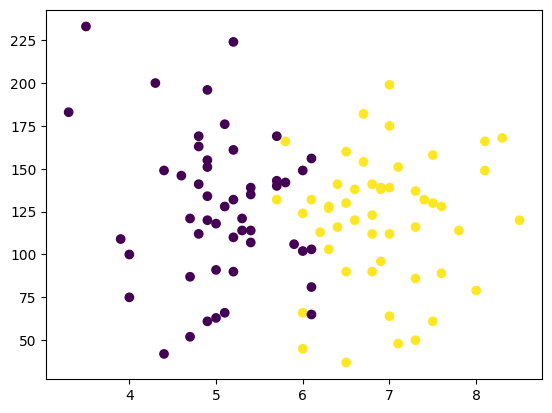

In [298]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [299]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [300]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [301]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [302]:
y.shape

(100,)

In [303]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [304]:
x_train

,cgpa,iq
9,5.1,66.0
2,5.3,121.0
83,7.5,130.0
76,4.9,155.0
75,4.8,169.0
...,...,...
61,7.3,137.0
17,3.3,183.0
72,7.3,116.0
11,6.9,138.0


In [305]:
x_test

,cgpa,iq
62,6.0,102.0
22,4.9,120.0
26,7.0,199.0
90,7.3,86.0
7,5.0,63.0
88,4.4,149.0
93,6.8,112.0
79,6.5,90.0
14,6.1,103.0
45,6.0,66.0


In [306]:
y_train

,placement
9,0
2,0
83,1
76,0
75,0
...,...
61,1
17,0
72,1
11,1


In [307]:
y_test

,placement
62,0
22,0
26,1
90,1
7,0
88,0
93,1
79,1
14,0
45,1


In [308]:
from sklearn.preprocessing import StandardScaler

In [309]:
scaler = StandardScaler()

In [310]:
x_train = scaler.fit_transform(x_train)

In [311]:
x_train

array([[-0.76718753, -1.4965834 ],
       [-0.59478584, -0.10617652],
       [ 1.30163278,  0.1213446 ],
       [-0.93958923,  0.75334772],
       [-1.02579007,  1.10726947],
       [ 0.87062855,  1.25895022],
       [-0.68098669, -0.8898604 ],
       [ 0.69822686,  0.39942597],
       [-0.85338838, -0.86458027],
       [ 0.7844277 ,  0.34886572],
       [-0.93958923, -1.62298402],
       [ 0.09482093, -1.11738152],
       [-0.59478584, -0.2831374 ],
       [-0.24998245,  0.17190485],
       [-0.76718753,  1.28423035],
       [-1.11199092, -0.96570077],
       [-0.24998245,  0.44998622],
       [-1.11199092, -1.85050515],
       [ 0.09482093, -1.52186352],
       [ 0.43962432,  0.87974835],
       [ 1.81883786,  1.0314291 ],
       [ 1.38783363, -0.91514052],
       [ 0.7844277 , -0.73817965],
       [ 0.00862008, -0.03033615],
       [-0.93958923,  1.78983285],
       [ 0.9568294 ,  0.65222722],
       [-0.16378161,  1.0314291 ],
       [-0.93958923,  0.65222722],
       [-0.85338838,

In [312]:
x_test = scaler.transform(x_test)

In [313]:
x_test

array([[ 0.00862008, -0.5864989 ],
       [-0.93958923, -0.13145665],
       [ 0.87062855,  1.86567322],
       [ 1.12923109, -0.9909809 ],
       [-0.85338838, -1.57242377],
       [-1.37059346,  0.60166697],
       [ 0.69822686, -0.33369765],
       [ 0.43962432, -0.8898604 ],
       [ 0.09482093, -0.56121877],
       [ 0.00862008, -1.4965834 ]])

In [314]:
from sklearn.linear_model import LogisticRegression

In [315]:
clf = LogisticRegression()

# Model Training

In [316]:
clf.fit(x_train, y_train)

LogisticRegression()

In [317]:
y_pred = clf.predict(x_test)

In [318]:
y_test

,placement
62,0
22,0
26,1
90,1
7,0
88,0
93,1
79,1
14,0
45,1


In [319]:
from sklearn.metrics import accuracy_score

In [320]:
accuracy_score(y_test, y_pred)

0.8

In [321]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

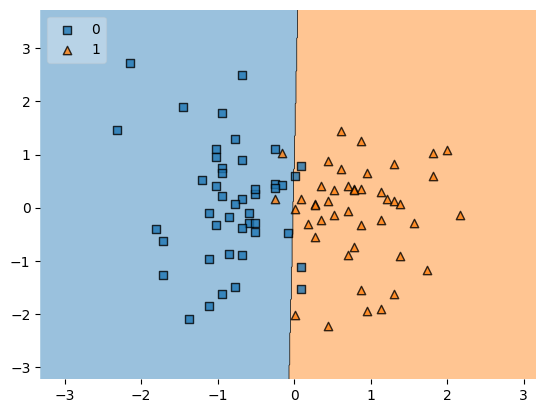

In [322]:
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2)

In [323]:
import pickle

In [324]:
pickle.dump(clf, open('model.pkl', 'wb'))